In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = data.DataReader('BAC', 'yahoo', start, end)

In [3]:
C = data.DataReader('C', 'yahoo', start, end)
GS = data.DataReader('GS', 'yahoo', start, end)
JPM = data.DataReader('JPM', 'yahoo', start, end)
MS = data.DataReader('MS', 'yahoo', start, end)
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [6]:
WFC.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,31.600000,31.975,31.195000,31.900000,23.077190,11016400
2006-01-04,31.799999,31.820,31.365000,31.530001,22.809519,10870000
2006-01-05,31.500000,31.555,31.309999,31.495001,22.784204,10158000
2006-01-06,31.580000,31.775,31.385000,31.680000,22.918036,8403800


In [7]:
tickers = ['BAC', 'C', 'GS', "JPM", 'MS', 'WFC']


bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys = tickers)



bank_stocks


bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']


bank_stocks.head()


Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.000080  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.607124  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.654278  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.599277  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.622845  15619400   

Bank Ticker           C                                        ...     \
Stock Info         Open        High         Low       Close    ...      
Date                                                           ...      
2006-01-03   490.000000  493.799988  481.100006  492.899994    ...      
2006-01-04   488.600006  491.000000  483.500000  483.799988    ...      
2006-01-05   484.399994  487.799988  484.000000  486.200012    ...      
2006-01-06   488.799988  489.000000  482.000000  486.200012    ...      
2006-01-09   486.000000  487.399994  483.000000  483.899994    ...      

Bank Ticker         MS                                       WFC             \
Stock Info         Low      Close  Adj Close   Volume       Open       High   
Date                                                                          
2006-01-03   56.740002  58.310001  40.062382  5377000  31.600000  31.975000   
2006-01-04   58.349998  58.349998  40.089870  7977800  31.799999  31.820000   
2006-01-05   58.020000  58.509998  40.199799  5778000  31.500000  31.555000   
2006-01-06   58.049999  58.570000  40.241035  6889800  31.580000  31.775000   
2006-01-09   58.619999  59.189999  40.666996  4144500  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
Date                                                    
2006-01-03   31.195000  31.900000  23.077190  11016400  
2006-01-04   31.365000  31.530001  22.809519  10870000  
2006-01-05   31.309999  31.495001  22.784204  10158000  
2006-01-06   31.385000  31.680000  22.918036   8403800  
2006-01-09   31.555000  31.674999  22.914423   5619600  

[5 rows x 36 columns]

In [8]:
bank_stocks.xs(key = "Close", axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [9]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' return'] = bank_stocks[tick]["Close"].pct_change()


returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


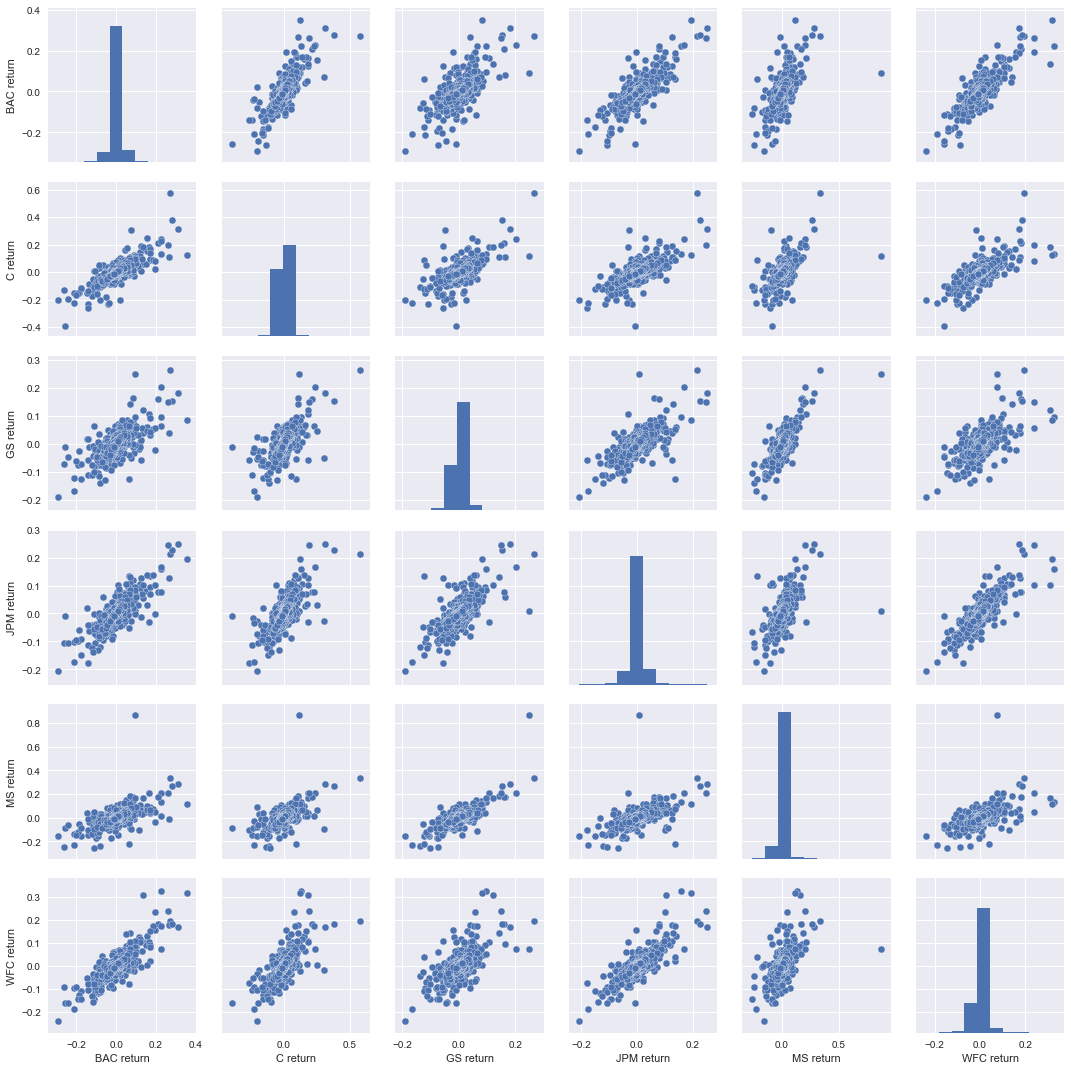

In [10]:
sns.pairplot(returns[1:])

In [11]:
returns.idxmin()


returns.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [12]:
returns.std()


BAC return    0.036647
C return      0.038672
GS return     0.025390
JPM return    0.027667
MS return     0.037819
WFC return    0.030238
dtype: float64

In [14]:
returns.ix['2015-01-01':'2015-12-31'].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

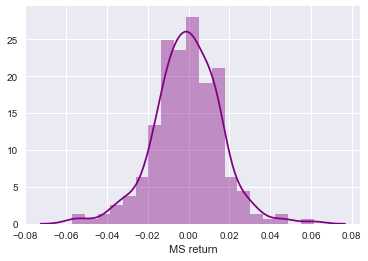

In [15]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS return'], color="purple")


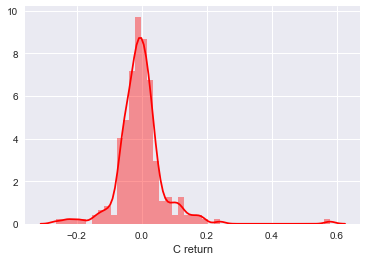

In [16]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C return'], color= "red")


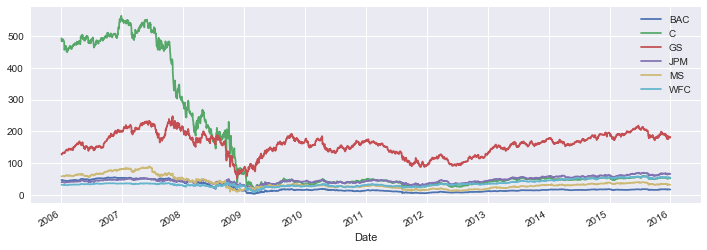

In [17]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label = tick, figsize=(12,4))
    plt.legend()


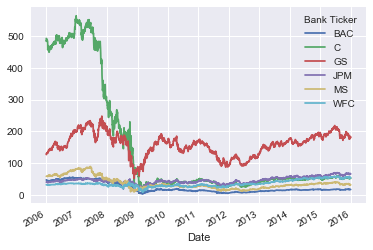

In [18]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

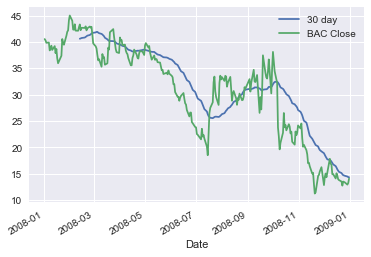

In [20]:
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()


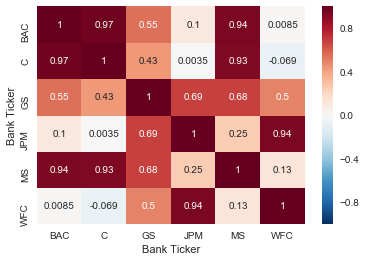

In [21]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)


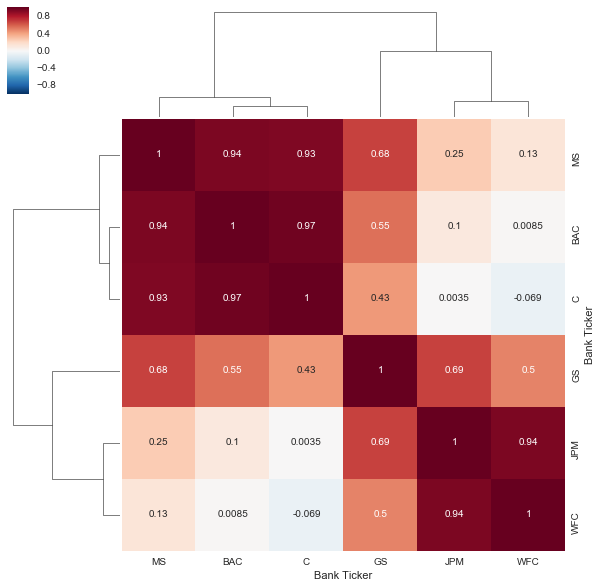

In [23]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)